In [1]:
import numpy as np
import pandas as pd
from viz import show_field
from MPGeneticSolver import MPGeneticSolver

In [2]:
train_df = pd.read_csv("resources/train.csv", index_col='id')
test_df = pd.read_csv("resources/test.csv", index_col='id')

In [3]:
train_df.head()

,delta,start.1,start.2,start.3,start.4,start.5,start.6,start.7,start.8,start.9,...,stop.391,stop.392,stop.393,stop.394,stop.395,stop.396,stop.397,stop.398,stop.399,stop.400
id,,,,,,,,,,,,,,,,,,,,,
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [4]:
rf_pred = pd.read_csv("s_0.4473684210526315.csv", index_col='id')

In [5]:
s = rf_pred.iloc[0].values

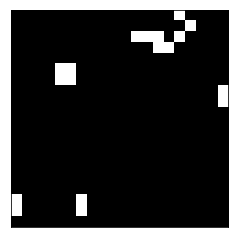

In [6]:
show_field(s)

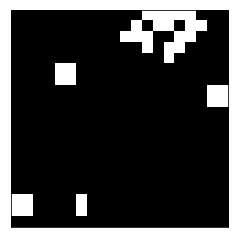

In [7]:
t = test_df.iloc[0, 1:].values
delta = test_df.iloc[0, 0]
show_field(t)

In [49]:
mpga = MPGeneticSolver(initialization_strategy=s, verbosity=1, patience=50, n_proc=10)

Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation #: best score
Generation  50 :  0.98
Generation  50 :  0.9825
Generation  50 :  0.985
Generation  50 :  0.98
Generation  50 :  0.98
Generation  50 :  0.9825
Generation  50 :  0.9825
Generation  50 :  0.9825
Generation  50 :  0.98
Generation  50 :  0.98
Generation  100 :  0.9875
Generation  100 :  0.9875
Generation  100 :  0.99
Generation  100 :  0.9875
Generation  100 :  0.99
Generation  100 :  0.9925
Generation  100 :  0.99
Generation  100 :  0.9875
Generation  100 :  0.9875
Generation  100 :  0.9875
Generation  150 :  0.9875
Generation  150 :  0.9875
Generation  150 :  0.9875
Generation  150 :  0.99
Generation  150 :  0.99
Generation  150 :  0.99
Generation  150 :  0.99
Generation  150 :  0.9875
Generation  150 :  0.9925
Generation  150 :  0.99
Early s

In [50]:
res = mpga.solve(t.reshape((20, 20)).astype(np.uint8), delta, return_all=True)

In [53]:
best_start, best_score = res[-1]

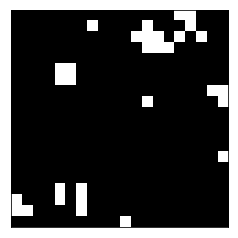

In [54]:
show_field(best_start)

In [57]:
boards = [board for (board, score) in res]

In [58]:
len(boards)

10

In [59]:
av_start = np.zeros_like(boards[0])
for board in boards:
    av_start += board
av_start = av_start / len(boards)

In [60]:
av_start[av_start >= 0.5] = 1
av_start[av_start < 0.5] = 0

In [61]:
av_start = av_start.astype(np.uint8)

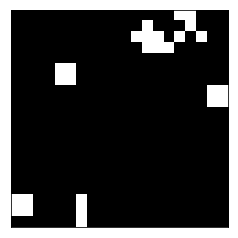

In [62]:
show_field(av_start)

In [63]:
import matplotlib.pyplot as plt
import pyximport
pyximport.install(language_level=3)
import life

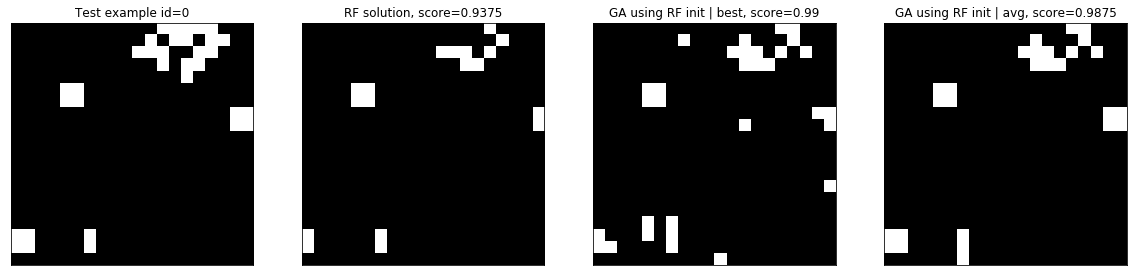

In [64]:
fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(1, 4, 1)
show_field(t)
ax0.set_title("Test example id=0")
ax1 = fig.add_subplot(1, 4, 2)
show_field(s)
ax1.set_title(f"RF solution, score={life.fitness_score(s.reshape((20, 20)).astype(np.uint8), t.reshape((20, 20)).astype(np.uint8), delta)}")
ax2 = fig.add_subplot(1, 4, 3)
show_field(best_start)
ax2.set_title(f"GA using RF init | best, score={life.fitness_score(best_start, t.reshape((20, 20)).astype(np.uint8), delta)}")
ax3 = fig.add_subplot(1, 4, 4)
show_field(av_start)
ax3.set_title(f"GA using RF init | avg, score={life.fitness_score(av_start, t.reshape((20, 20)).astype(np.uint8), delta)}")
plt.savefig("rf_ga.png")

In [30]:
rf_pred.iloc[0] = start.ravel()

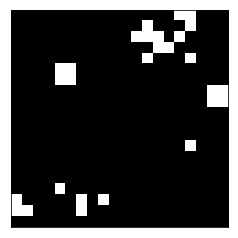

In [31]:
test = rf_pred.iloc[0].values
show_field(test)

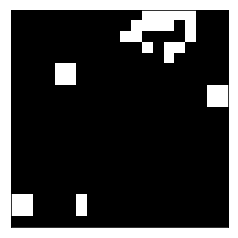

In [34]:
show_field(life.make_move(test.reshape((20, 20)).astype(np.uint8), delta))